<h1> Load LUX Data </h1>

<h3> we need to work on linking to eliza3, but you can access it if running this notebook from pdsf </h3>

<h2 style="color:magenta;"> Import Libraries </h2>

In [1]:
from __future__ import division
import scipy                    #
from pylab import *             # includes numpy
import matplotlib.pyplot as plt # plotting libraries from matlab
from scipy.optimize import curve_fit # for fitting

In [2]:
%pylab inline  
#always do this for plotting... again, don't ask why

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures

<h3 style="color:magenta;"> importing aLib.... this is a total hack for now <br/> ideally point your ipython path to LUXcode, something like: <br/> export PYTHONPATH=/Users/attiladobi/LUXCode/Trunk/DataAnalysis/Python </h3>

In [4]:
import sys
sys.path.insert(2, '//global/project/projectdirs/lux/data')

In [5]:
import aLib

<h3 style="color:blue;"> Note: import os if you want to use bash commands like cd and ls </h3>

<h2> Load a Kr data set, in LUX projectdir not from eliza3 </h2>

<p> rqs to load </p>

In [6]:
fieldsToKeep = [
	'pulse_classification','admin' , 'golden','file_number','prompt_fraction','pulse_area_phe','selected_s1_s2',
    'aft_t0_samples','aft_t1_samples','event_timestamp_samples','x_corrected','y_corrected'
    ]

#and many many more ... such as (this is taken from matlab, so will have to reformat)

#rqs_to_load = {'event_number','pulse_area_phe','event_timestamp_samples','x_cm','y_cm','chi2'...
#   ,'prompt_fraction','aft_t1_samples','pulse_start_samples','pulse_end_samples'...
#   , 'top_bottom_asymmetry','top_bottom_ratio','pulse_classification' ...
#   ,'aft_t0_samples','aft_t2_samples','exp_fit_tau_fall_samples','exp_fit_tau_rise_samples'...
#   ,'exp_fit_amplitude_phe_per_sample','full_evt_area_phe'...
#   ,'z_drift_samples' ,'golden','selected_s1_s2','x_corrected','y_corrected'...
#   ,'spike_count','peak_area_phe','correction_s2_xy_dependence_bot'...
#   ,'z_corrected_pulse_area_all_phe','xyz_corrected_pulse_area_all_phe','z_corrected_pulse_area_bot_phe'...
#   ,'xyz_corrected_pulse_area_bot_phe','correction_electron_lifetime','correction_s2_xy_dependence'...
#   ,'correction_s1_z_dependence','correction_s1_xyz_dependence','correction_s1_xyz_dependence_bot'...
#   ,'rms_width_samples'

<h3> Example to only load in golden events </h3> <br/> <p>(Aaron M. is a lifesaver, this function will creat a python dictionary for the rqs similar to the structs in matlab or blah blah blah in root</p>

In [7]:
#Define your cut
def cut_golden(b):
	return ( (b.golden[0,:] == 1) & (b.selected_s1_s2[0,:]==1) )

#Another Example, radial cut:
"""
def cut_radial(b):
	cut_S2 = (b.pulse_classification==2) & ((b.pulse_classification==2).cumsum(0)==1) & (b.golden==1)
	x = b.x_corrected[cut_S2]
	y = b.y_corrected[cut_S2]
	if len(x) != b.golden[0,:].sum():
		raise ValueError("WRONG SIZE")
	return x**2 + y**2 < (18.**2)
"""

#list the cuts that you will use
cutList = [cut_golden]

#point to the data acquisition's path (the matfiles)
rqBasePath_list = ['/global/project/projectdirs/lux/data/rq/lux10_20130717T1424_cp10496/matfiles/']


#This is what load in data with your cuts
d = aLib.dp.concatRQsWcuts(rqBasePath_list, fieldsToKeep, cuts=cutList)

#..... If you want to load ALL rqs with NO CUTS!! 
#d=aLib.dp.concatRQsWcuts(rqBasePath_list, fieldsToKeep, cuts='none', fileList='all', printMultiple=5, sleepTimeBetween=0.0)



** concatRQsWcuts encourages you to graduate from the stone age and
   switch from python v2.7 to v3.x.


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< dp.concatRQsWcuts >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<                                          STARTING                                          >>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


Determining total number of files..	 1037
Estimating number of events that will pass cuts.......... Roughly 15969

********** Allocating 6.6 MB **********


**** /global/project/projectdirs/lux/data/rq/lux10_20130717T1424_cp10496/matfiles/ ****
PAST PAST PAST PAST PAST PAST PAST PAST 
flag_pastAllocate = True



Number of events before cuts: 357731
Number of events after  cuts: 45199
  Cut name: Num passing
----------: -----------
cut_golden: 45212


<h3> View the structure "dictionary" d </h3>

In [9]:
d

Dictionary contents:
                    FIELDS: TYPE                        CONTENTS
                    ------  ----                        --------
                  RQ_paths: [1 list],                    
            aft_t0_samples: [(10, 45199) int32array],   [-409 -408 -410 -409 -410 -410...
            aft_t1_samples: [(10, 45199) int32array],   [-404 -403 -405 -405 -405 -406...
   event_timestamp_samples: [(45199,) float64array],    [  3.66259349e+09   4.81153176...
                   fileNum: [(45213,) uint16array],     [0 0 0 0 0 1 1 1 1 2 2 2 2 3 3...
               file_number: [(45199,) uint32array],     [  2   2   2   2   2   5   5  ...
                    golden: [(10, 45199) uint32array],  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
               numCutsPass: [1 list],                    
            numEventsTotal: [1 int],                    357731
                   pathNum: [(45213,) uint8array],      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
           prompt_fraction: [(10, 45199)

<h3> Plot the 83Kr S1 and S2 </h3>

In [10]:
S1=d.pulse_area_phe[d.pulse_classification==1]
S2=d.pulse_area_phe[d.pulse_classification==2]

In [11]:
#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

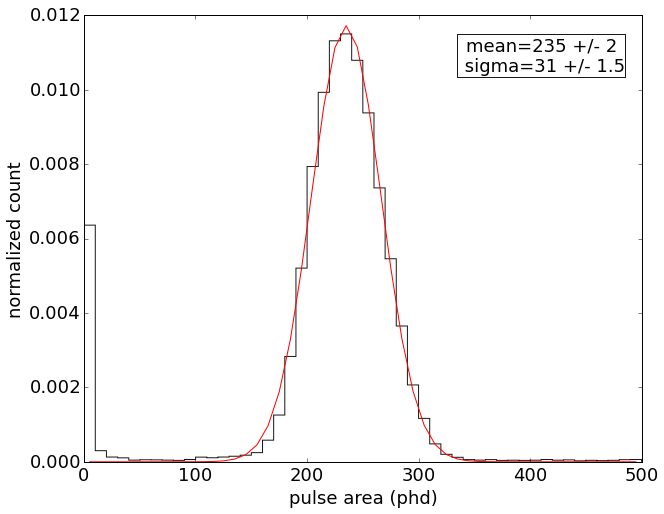

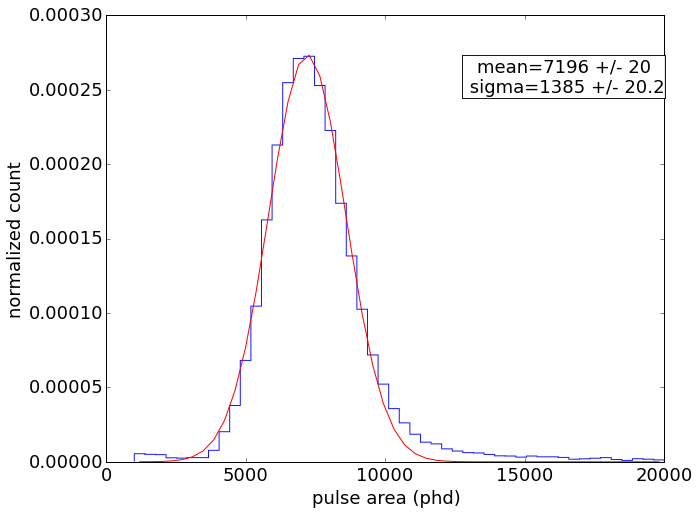

In [12]:
# the histogram of the data with histtype='step'
cut=aLib.inrange(S1,[0,500])
n, bin_edges, patches = plt.hist(S1[cut], 50, normed=1, facecolor='none',edgecolor='black', histtype='step', alpha=0.9)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2
popt, pcov = curve_fit(gauss_function, bin_center,n,p0 = [1, mean(S1[cut]), std(S1[cut])])
plt.plot(bin_center,gauss_function(bin_center, *popt),'-r')
plt.text(bin_edges.max()*.82,n.max()*.95,'mean={:1.0f} +/- {:1.0f} \n sigma={:1.0f} +/- {:1.1f}'.format(popt[1],sqrt(pcov[1,1]),popt[2],sqrt(pcov[2,2])),
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.xlabel('pulse area (phd)')
plt.ylabel('normalized count')
plt.rcParams.update({'font.size': 18}) #increase all fontsizes

figure()
cut2=aLib.inrange(S2,[1000,20000])
n, bin_edges, patches = plt.hist(S2[cut2], 50, normed=1, facecolor='none',edgecolor='blue', histtype='step', alpha=0.9)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2
popt, pcov = curve_fit(gauss_function, bin_center,n,p0 = [1, mean(S2[cut2]), std(S2[cut2])])
plt.plot(bin_center,gauss_function(bin_center, *popt),'-r')
plt.text(bin_edges.max()*.82,n.max()*.95,'mean={:1.0f} +/- {:1.0f} \n sigma={:1.0f} +/- {:1.1f}'.format(popt[1],sqrt(pcov[1,1]),popt[2],sqrt(pcov[2,2])),
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.xlabel('pulse area (phd)')
plt.ylabel('normalized count')
plt.rcParams.update({'font.size': 18}) #increase all fontsizes

<h1> Back to the basics </h1> <br/>
<h3 style="color:blue;"> making your own pulse classification cuts </h3>

<p> load in all selected rqs without applying any cuts </p>

In [122]:
rqBasePath_list = ['/global/project/projectdirs/lux/data/rq/lux10_20130717T1424_cp10496/matfiles/']
d=aLib.dp.concatRQsWcuts(rqBasePath_list, fieldsToKeep, cuts='none', fileList='all', printMultiple=5, sleepTimeBetween=0.0)

** concatRQsWcuts encourages you to graduate from the stone age and
   switch from python v2.7 to v3.x.


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< dp.concatRQsWcuts >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<                                          STARTING                                          >>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


Determining total number of files..	 1037
Estimating number of events that will pass cuts.......... Roughly 325721

********** Allocating 119.7 MB **********


**** /global/project/projectdirs/lux/data/rq/lux10_20130717T1424_cp10496/matfiles/ ****
PAST PAST PAST PAST PAST PAST PAST PAST 
flag_pastAllocate = True



<h2> Make a density plot of prompt fraction vs. pulse area </h2><br/><p>this is how we distinguish S1 and S2</p>

/global/common/wald/usg/software/python/2.7.9/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app
/global/common/wald/usg/software/python/2.7.9/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from IPython.kernel.zmq import kernelapp as app


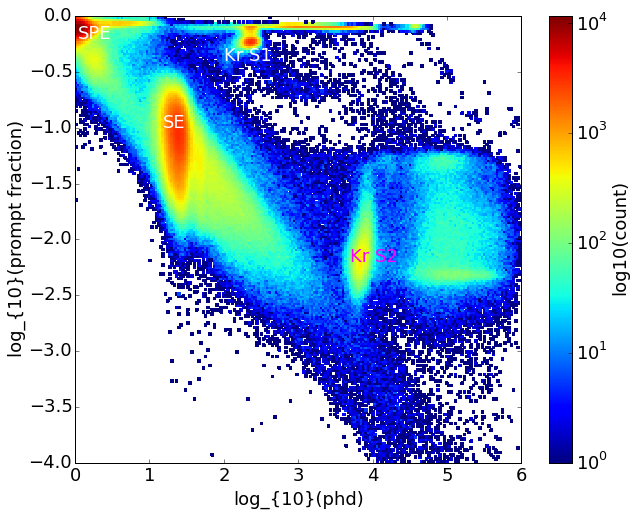

In [72]:
xx=d.pulse_area_phe.size
figure=aLib.plot2d(log10(np.reshape(d.pulse_area_phe,(xx))),log10(np.reshape(d.prompt_fraction,(xx))),[0,6],[-4,0],200,200,'log10')

pylab.xlabel('log_{10}(phd)',fontsize=18)
pylab.ylabel('log_{10}(prompt fraction)',fontsize=18)
cc=pylab.colorbar()
cc.set_label('log10(count)',fontsize=18)

plt.text(.05,-.2,'SPE',fontsize=18,color='white')
plt.text(1.2,-1,'SE',fontsize=18,color='white')
plt.text(2,-.4,'Kr S1',fontsize=18,color='white')
plt.text(3.7,-2.2,'Kr S2',fontsize=18,color='magenta')

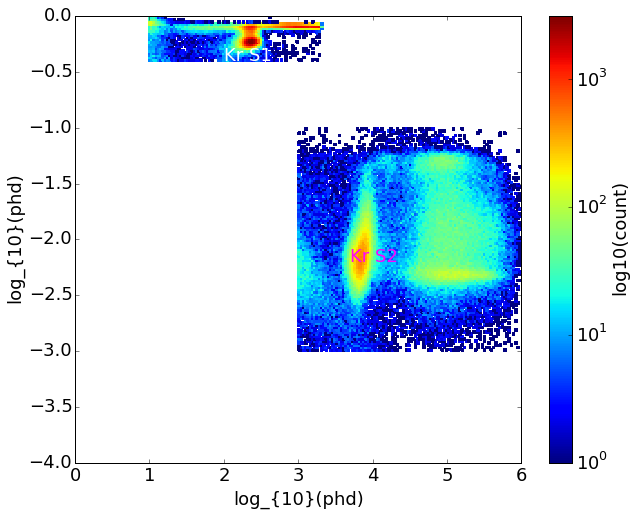

In [73]:
# Cut based on prompt fraction (Kr and gammas)
s1_index = aLib.inrange(d.pulse_area_phe,[10,2000]) & aLib.inrange(d.prompt_fraction,[10**(0),10**(-.4)]); 
s2_index = aLib.inrange(d.pulse_area_phe,[10**3,10**6]) & aLib.inrange(d.prompt_fraction,[10**(-3),10**(-1)]); 

#Plot the S1 cut
figure1=aLib.plot2d(log10(d.pulse_area_phe[s1_index | s2_index]),log10(d.prompt_fraction[s1_index | s2_index]),[0,6],[-4,0],200,200,'log10')

pylab.xlabel('log_{10}(phd)',fontsize=18)
pylab.ylabel('log_{10}(phd)',fontsize=18)
cc=pylab.colorbar()
cc.set_label('log10(count)',fontsize=18)


plt.text(2,-.4,'Kr S1',fontsize=18,color='white')
plt.text(3.7,-2.2,'Kr S2',fontsize=18,color='magenta')


<h3>only select events that contain 1 S1 and 1 S2. And calculate dT</h3>

In [109]:
# require S1 first
s2_index_2=s2_index & (cumsum(s1_index,0)-(s1_index==1))
#require only 1 S1 and 1 S2 in an event
single_s1_s2_cut = (sum(s2_index_2,0)==1) & (sum(s1_index,0)==1) 


#Finds the index of the S2 event in cases that only have one S1 and S2 ... repmat in matlab replaced iwth tile
s2_good_cut = cumsum(s2_index_2,0)*(s2_index_2==1) & tile(single_s1_s2_cut,(10,1)) # 10 is the number of pulses/evt

#Finds the index of the S1 event in cases that only have one S1 and S2
s1_good_cut = cumsum(s1_index,0)*(s1_index==1) & tile(single_s1_s2_cut,(10,1))

#Calculate the time time differece between the S2 and S1 pulse
dT=d.aft_t0_samples[(s2_good_cut==1)]-d.aft_t1_samples[(s1_good_cut==1)];

#convert to micro-seconds
dT=dT*1e-2;

In [110]:
dT.size

83466

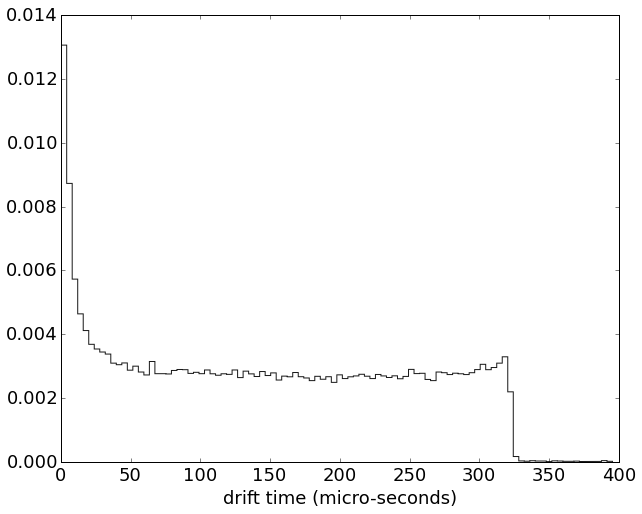

In [120]:
n, bin_edges, patches = plt.hist(dT[(dT>=0) & (dT<400)], 100, normed=1, facecolor='none',edgecolor='black', histtype='step', alpha=0.9)
plt.xlabel('drift time (micro-seconds)')

<h1> Plot the alpha population </h1>

In [69]:
alpha_index= aLib.inrange(d.pulse_area_phe,[2*10**4,7*10**4]) & (d.prompt_fraction>10**(-.4)) ;

pulse_area=d.pulse_area_phe;

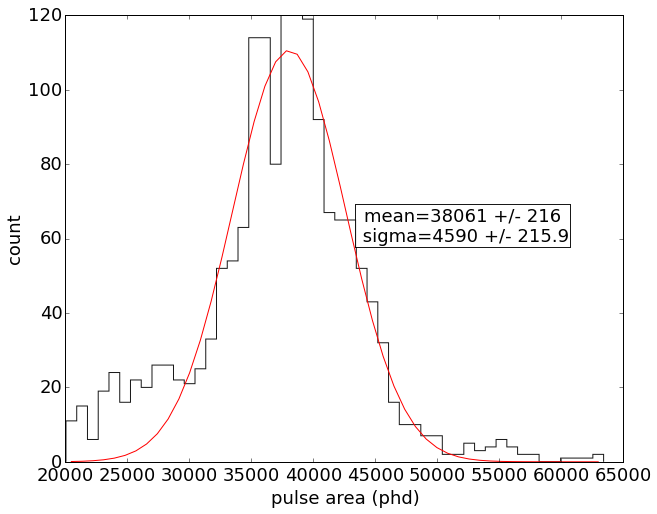

In [70]:
# the histogram of the data with histtype='step'
cut=alpha_index
n, bin_edges, patches = plt.hist(pulse_area[cut], 50, normed=0, facecolor='none',edgecolor='black', histtype='step', alpha=0.9)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2
popt, pcov = curve_fit(gauss_function, bin_center,n,p0 = [1, mean(pulse_area[cut]), std(pulse_area[cut])])
plt.plot(bin_center,gauss_function(bin_center, *popt),'-r')
plt.text(bin_edges.max()*.82,n.max()*.5,'mean={:1.0f} +/- {:1.0f} \n sigma={:1.0f} +/- {:1.1f}'.format(popt[1],sqrt(pcov[1,1]),popt[2],sqrt(pcov[2,2])),
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.xlabel('pulse area (phd)')
plt.ylabel('count')
plt.rcParams.update({'font.size': 18}) #increase all fontsizes

<h1> rough estimate of the alpha rate </h1>

In [71]:
#count/second
sum(alpha_index==1)/((d.event_timestamp_samples[-1]-d.event_timestamp_samples[0])/10**8)

0.13694108582643835